In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2022.csv')
#=====================================================================
data = data[data.nuts2_name == 'CENTRAL MACEDONIA']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN mosq regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Greece/Central Macedonia/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

Bounds: [    0.      5.     14.     28.     50.     85.    144.    238.    405.6
   754.  10458. ]


In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 100, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 20.21322 | Val Loss: 16.41330 | Train Acc: 3.748| Val Acc: 3.413
Epoch 002: | Train Loss: 12.04638 | Val Loss: 10.02736 | Train Acc: 2.837| Val Acc: 2.592
Epoch 003: | Train Loss: 8.94551 | Val Loss: 8.06328 | Train Acc: 2.381| Val Acc: 2.276
Epoch 004: | Train Loss: 7.63725 | Val Loss: 7.30347 | Train Acc: 2.183| Val Acc: 2.143
Epoch 005: | Train Loss: 6.97095 | Val Loss: 6.79507 | Train Acc: 2.084| Val Acc: 2.061
Epoch 006: | Train Loss: 6.45677 | Val Loss: 6.16374 | Train Acc: 1.995| Val Acc: 1.953
Epoch 007: | Train Loss: 6.05375 | Val Loss: 5.67388 | Train Acc: 1.926| Val Acc: 1.867
Epoch 008: | Train Loss: 5.65635 | Val Loss: 5.28542 | Train Acc: 1.861| Val Acc: 1.781
Epoch 009: | Train Loss: 5.34292 | Val Loss: 5.03489 | Train Acc: 1.806| Val Acc: 1.762
Epoch 010: | Train Loss: 5.14257 | Val Loss: 4.97362 | Train Acc: 1.759| Val Acc: 1.755
Epoch 011: | Train Loss: 4.96265 | Val Loss: 4.89530 | Train Acc: 1.753| Val Acc: 1.719
Epoch 012: | Train Loss: 4.8

Epoch 095: | Train Loss: 2.60904 | Val Loss: 4.36367 | Train Acc: 1.252| Val Acc: 1.560
Epoch 096: | Train Loss: 2.54960 | Val Loss: 4.39137 | Train Acc: 1.233| Val Acc: 1.569
Epoch 097: | Train Loss: 2.53047 | Val Loss: 4.39343 | Train Acc: 1.217| Val Acc: 1.545
Epoch 098: | Train Loss: 2.53891 | Val Loss: 4.31376 | Train Acc: 1.230| Val Acc: 1.552
Epoch 099: | Train Loss: 2.56448 | Val Loss: 4.29103 | Train Acc: 1.246| Val Acc: 1.541
Epoch 100: | Train Loss: 2.49128 | Val Loss: 4.31585 | Train Acc: 1.222| Val Acc: 1.568


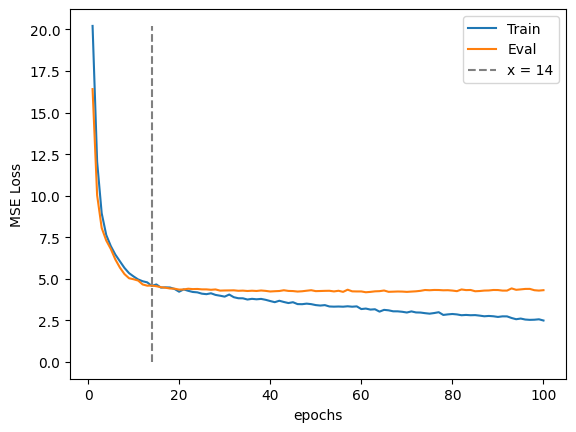

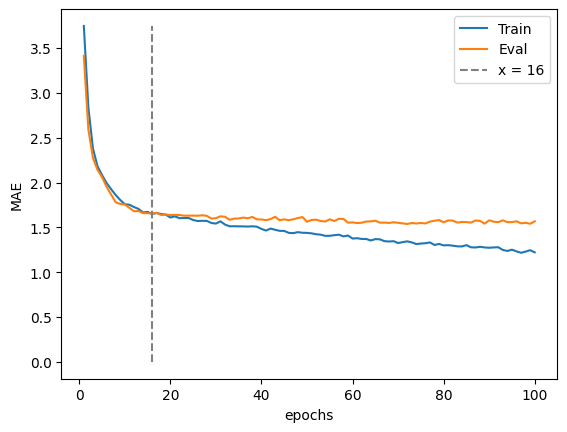

MAE on train set:  1.04210875331565
min prediction: 0
max prediction: 9

MAE on test set:  1.575221238938053
Error <= 3: 91.49 %
min prediction: 0
max prediction: 9


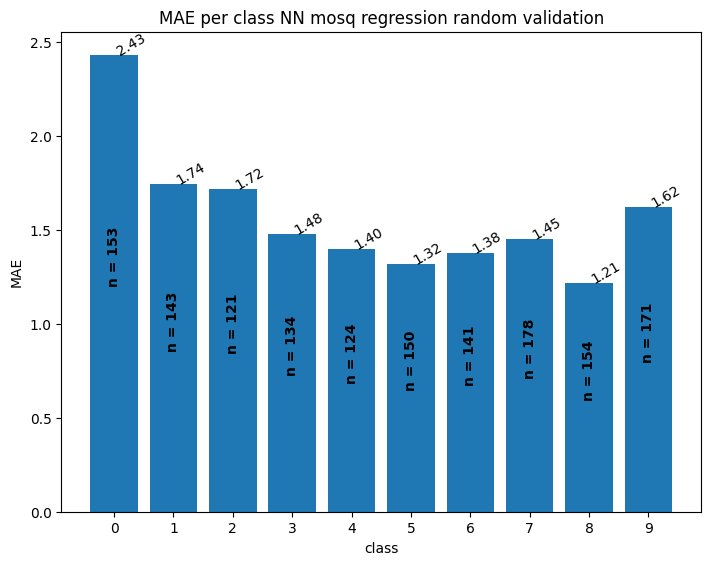

-----------|class error-MAE| difference-----------
mean: 0.2518905005571488
std: 0.21502338324042172
coefficient of variation (std/mean): 0.853638318097817

----------normalized difference-------------
mean: 0.31040512298415934
std: 0.2649737071131438


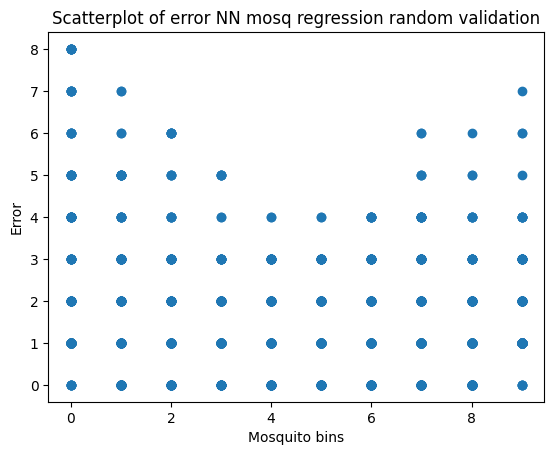

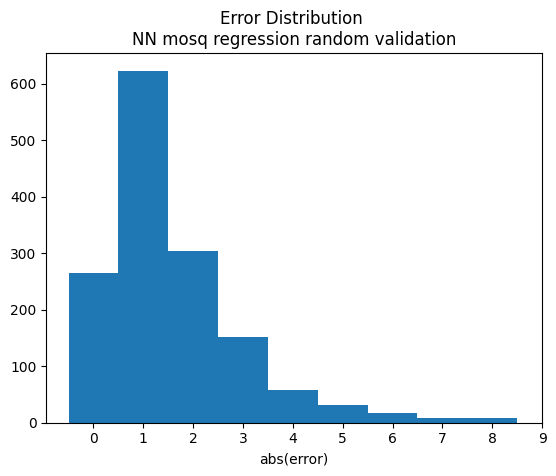

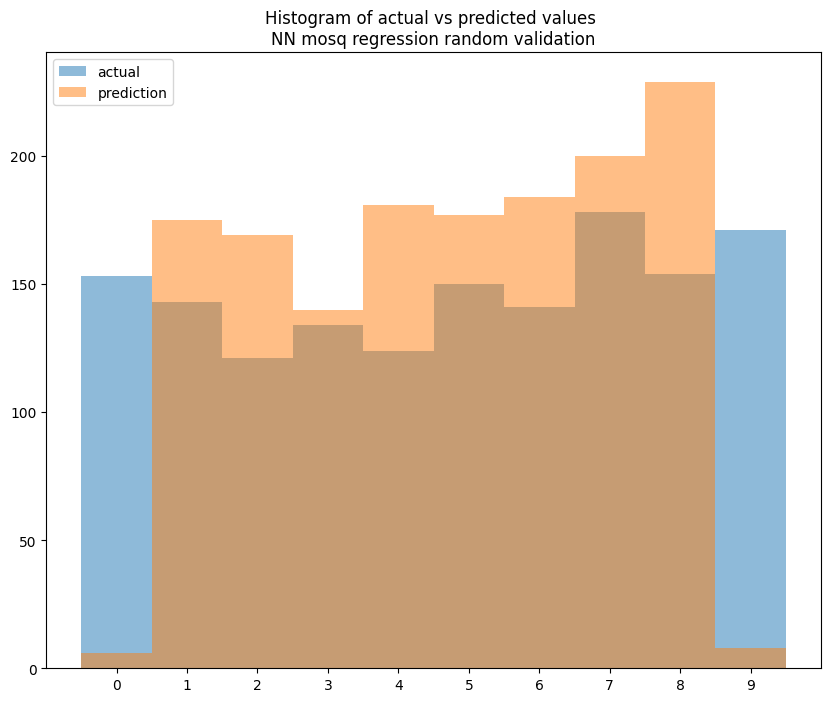

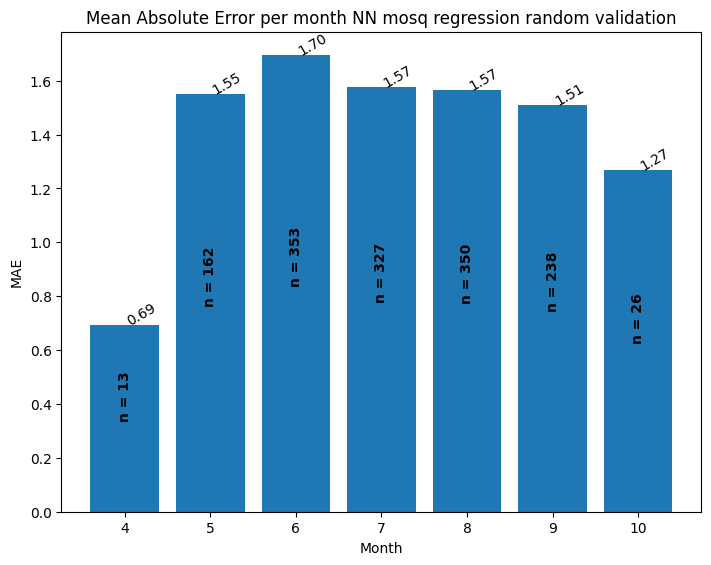

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 20.03947 | Val Loss: 13.45707 | Train Acc: 3.737| Val Acc: 3.011
Epoch 002: | Train Loss: 11.90952 | Val Loss: 8.48309 | Train Acc: 2.827| Val Acc: 2.376
Epoch 003: | Train Loss: 8.86447 | Val Loss: 7.17327 | Train Acc: 2.390| Val Acc: 2.136
Epoch 004: | Train Loss: 7.43170 | Val Loss: 6.59729 | Train Acc: 2.160| Val Acc: 2.038
Epoch 005: | Train Loss: 6.94392 | Val Loss: 6.31930 | Train Acc: 2.075| Val Acc: 1.977
Epoch 006: | Train Loss: 6.48692 | Val Loss: 5.86125 | Train Acc: 1.999| Val Acc: 1.902
Epoch 007: | Train Loss: 6.16798 | Val Loss: 5.63533 | Train Acc: 1.944| Val Acc: 1.872
Epoch 008: | Train Loss: 5.98272 | Val Loss: 5.31025 | Train Acc: 1.912| Val Acc: 1.836
Epoch 009: | Train Loss: 5.56233 | Val Loss: 5.17403 | Train Acc: 1.845| Val Acc: 1.786
Epoch 010: | Train Loss: 5.49902 | Val Loss: 5.07850 | Train Acc: 1.833| Val Acc: 1.763
Epoch 011: | Train Loss: 5.26970 | Val Loss: 4.97443 | Train Acc: 1.790| Val Acc: 1.728
Epoch 012: | Train Loss: 5.04

Epoch 095: | Train Loss: 2.67239 | Val Loss: 4.63805 | Train Acc: 1.271| Val Acc: 1.563
Epoch 096: | Train Loss: 2.72839 | Val Loss: 4.64434 | Train Acc: 1.277| Val Acc: 1.570
Epoch 097: | Train Loss: 2.65654 | Val Loss: 4.55285 | Train Acc: 1.275| Val Acc: 1.535
Epoch 098: | Train Loss: 2.54236 | Val Loss: 4.59247 | Train Acc: 1.233| Val Acc: 1.550
Epoch 099: | Train Loss: 2.64654 | Val Loss: 4.64033 | Train Acc: 1.263| Val Acc: 1.567
Epoch 100: | Train Loss: 2.65458 | Val Loss: 4.48239 | Train Acc: 1.260| Val Acc: 1.569


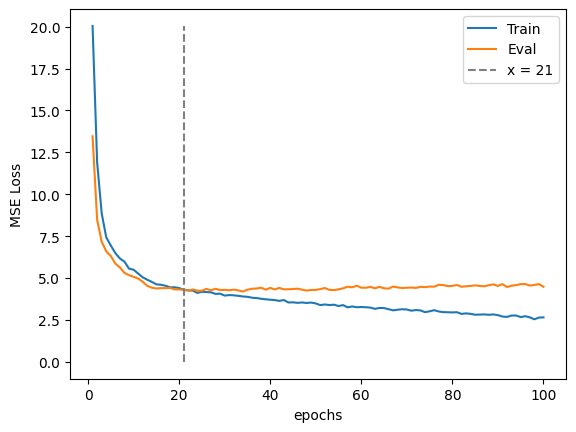

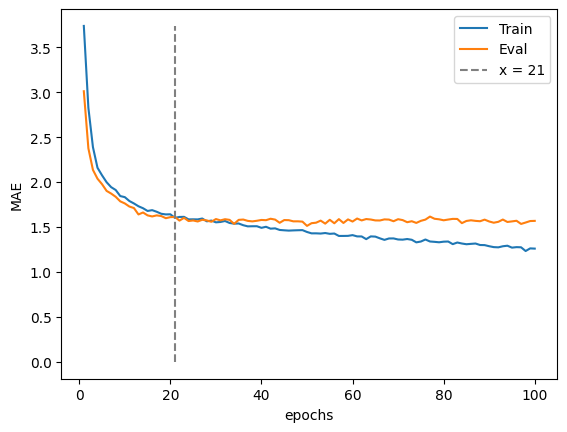

Epoch 001: | Train Loss: 19.79556 | Val Loss: 12.70913 | Train Acc: 3.716| Val Acc: 2.897
Epoch 002: | Train Loss: 11.64924 | Val Loss: 8.64451 | Train Acc: 2.793| Val Acc: 2.282
Epoch 003: | Train Loss: 8.86954 | Val Loss: 7.53853 | Train Acc: 2.381| Val Acc: 2.118
Epoch 004: | Train Loss: 7.48374 | Val Loss: 6.98866 | Train Acc: 2.161| Val Acc: 2.051
Epoch 005: | Train Loss: 6.95481 | Val Loss: 6.37271 | Train Acc: 2.074| Val Acc: 1.967
Epoch 006: | Train Loss: 6.33183 | Val Loss: 6.04699 | Train Acc: 1.964| Val Acc: 1.924
Epoch 007: | Train Loss: 6.10188 | Val Loss: 5.74027 | Train Acc: 1.938| Val Acc: 1.858
Epoch 008: | Train Loss: 5.76236 | Val Loss: 5.45673 | Train Acc: 1.874| Val Acc: 1.831
Epoch 009: | Train Loss: 5.58300 | Val Loss: 5.14702 | Train Acc: 1.841| Val Acc: 1.819
Epoch 010: | Train Loss: 5.38966 | Val Loss: 5.05635 | Train Acc: 1.812| Val Acc: 1.756
Epoch 011: | Train Loss: 5.23730 | Val Loss: 4.76555 | Train Acc: 1.790| Val Acc: 1.720
Epoch 012: | Train Loss: 4.97

Epoch 095: | Train Loss: 2.62854 | Val Loss: 4.49618 | Train Acc: 1.248| Val Acc: 1.600
Epoch 096: | Train Loss: 2.59692 | Val Loss: 4.51740 | Train Acc: 1.239| Val Acc: 1.603
Epoch 097: | Train Loss: 2.62408 | Val Loss: 4.54249 | Train Acc: 1.254| Val Acc: 1.602
Epoch 098: | Train Loss: 2.60851 | Val Loss: 4.39007 | Train Acc: 1.247| Val Acc: 1.556
Epoch 099: | Train Loss: 2.50431 | Val Loss: 4.37710 | Train Acc: 1.230| Val Acc: 1.566
Epoch 100: | Train Loss: 2.58845 | Val Loss: 4.42725 | Train Acc: 1.242| Val Acc: 1.573


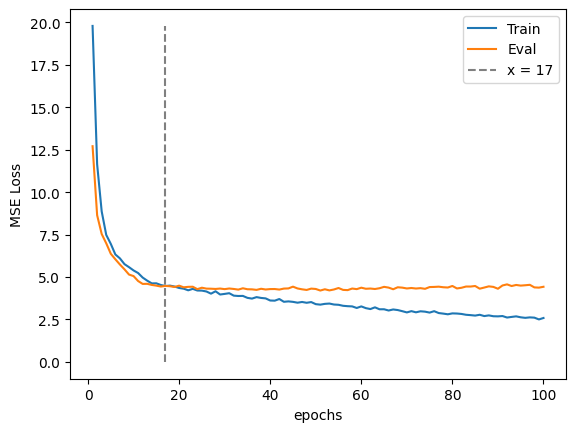

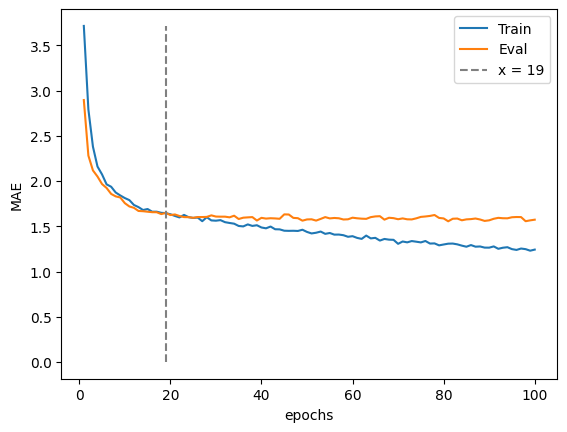

Epoch 001: | Train Loss: 19.77641 | Val Loss: 14.27730 | Train Acc: 3.706| Val Acc: 3.162
Epoch 002: | Train Loss: 11.57109 | Val Loss: 8.80551 | Train Acc: 2.786| Val Acc: 2.373
Epoch 003: | Train Loss: 8.62534 | Val Loss: 6.96888 | Train Acc: 2.351| Val Acc: 2.053
Epoch 004: | Train Loss: 7.46765 | Val Loss: 6.15792 | Train Acc: 2.173| Val Acc: 1.924
Epoch 005: | Train Loss: 6.82407 | Val Loss: 5.92266 | Train Acc: 2.052| Val Acc: 1.863
Epoch 006: | Train Loss: 6.24822 | Val Loss: 5.40686 | Train Acc: 1.956| Val Acc: 1.782
Epoch 007: | Train Loss: 6.02508 | Val Loss: 4.98260 | Train Acc: 1.922| Val Acc: 1.738
Epoch 008: | Train Loss: 5.43496 | Val Loss: 4.90303 | Train Acc: 1.830| Val Acc: 1.686
Epoch 009: | Train Loss: 5.28216 | Val Loss: 4.67628 | Train Acc: 1.792| Val Acc: 1.656
Epoch 010: | Train Loss: 5.20175 | Val Loss: 4.57949 | Train Acc: 1.779| Val Acc: 1.644
Epoch 011: | Train Loss: 5.04468 | Val Loss: 4.49428 | Train Acc: 1.755| Val Acc: 1.602
Epoch 012: | Train Loss: 4.90

Epoch 095: | Train Loss: 2.65854 | Val Loss: 4.23503 | Train Acc: 1.267| Val Acc: 1.513
Epoch 096: | Train Loss: 2.63953 | Val Loss: 4.20988 | Train Acc: 1.251| Val Acc: 1.518
Epoch 097: | Train Loss: 2.67239 | Val Loss: 4.21265 | Train Acc: 1.271| Val Acc: 1.498
Epoch 098: | Train Loss: 2.58839 | Val Loss: 4.21674 | Train Acc: 1.242| Val Acc: 1.493
Epoch 099: | Train Loss: 2.58143 | Val Loss: 4.20545 | Train Acc: 1.231| Val Acc: 1.505
Epoch 100: | Train Loss: 2.58180 | Val Loss: 4.27861 | Train Acc: 1.249| Val Acc: 1.509


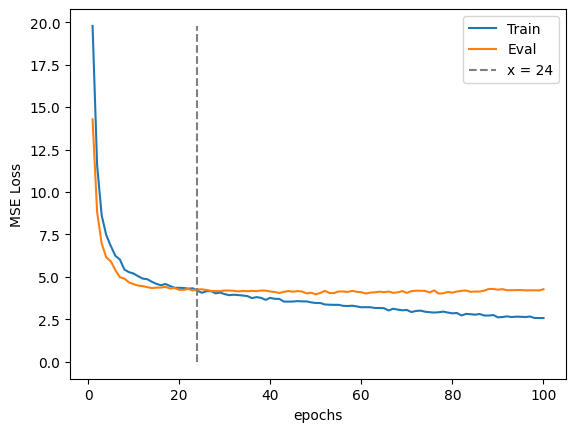

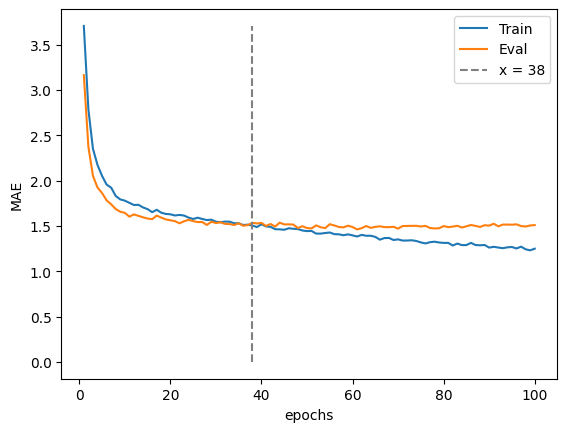

Epoch 001: | Train Loss: 19.58740 | Val Loss: 13.93925 | Train Acc: 3.680| Val Acc: 3.143
Epoch 002: | Train Loss: 11.59356 | Val Loss: 9.14390 | Train Acc: 2.782| Val Acc: 2.442
Epoch 003: | Train Loss: 8.86959 | Val Loss: 7.68266 | Train Acc: 2.382| Val Acc: 2.207
Epoch 004: | Train Loss: 7.59002 | Val Loss: 6.75956 | Train Acc: 2.176| Val Acc: 2.028
Epoch 005: | Train Loss: 6.86727 | Val Loss: 6.35812 | Train Acc: 2.064| Val Acc: 1.960
Epoch 006: | Train Loss: 6.47784 | Val Loss: 6.06510 | Train Acc: 1.996| Val Acc: 1.883
Epoch 007: | Train Loss: 6.14005 | Val Loss: 5.88284 | Train Acc: 1.945| Val Acc: 1.851
Epoch 008: | Train Loss: 5.91092 | Val Loss: 5.57550 | Train Acc: 1.902| Val Acc: 1.794
Epoch 009: | Train Loss: 5.71091 | Val Loss: 5.20063 | Train Acc: 1.869| Val Acc: 1.726
Epoch 010: | Train Loss: 5.57066 | Val Loss: 4.97552 | Train Acc: 1.839| Val Acc: 1.697
Epoch 011: | Train Loss: 5.36386 | Val Loss: 4.76411 | Train Acc: 1.800| Val Acc: 1.632
Epoch 012: | Train Loss: 5.19

Epoch 095: | Train Loss: 2.60706 | Val Loss: 4.34421 | Train Acc: 1.249| Val Acc: 1.555
Epoch 096: | Train Loss: 2.64600 | Val Loss: 4.35900 | Train Acc: 1.255| Val Acc: 1.564
Epoch 097: | Train Loss: 2.62179 | Val Loss: 4.37255 | Train Acc: 1.249| Val Acc: 1.564
Epoch 098: | Train Loss: 2.57028 | Val Loss: 4.42167 | Train Acc: 1.238| Val Acc: 1.557
Epoch 099: | Train Loss: 2.66857 | Val Loss: 4.41547 | Train Acc: 1.267| Val Acc: 1.567
Epoch 100: | Train Loss: 2.59278 | Val Loss: 4.51413 | Train Acc: 1.239| Val Acc: 1.581


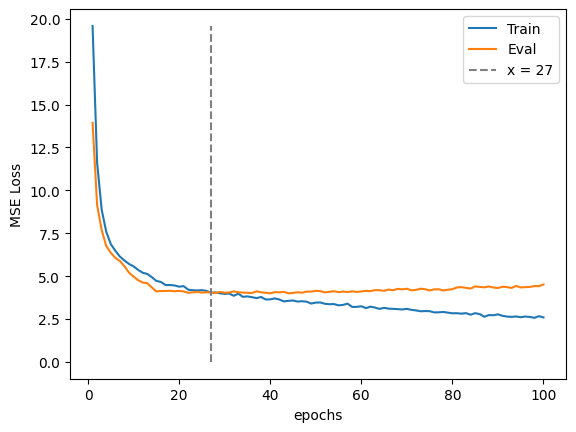

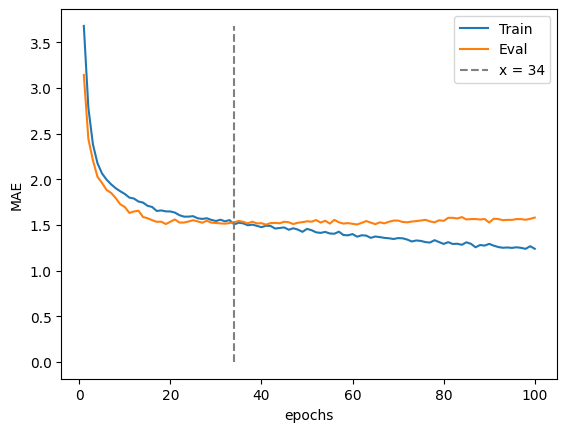

Epoch 001: | Train Loss: 19.73461 | Val Loss: 13.25401 | Train Acc: 3.701| Val Acc: 3.049
Epoch 002: | Train Loss: 11.53268 | Val Loss: 8.69420 | Train Acc: 2.771| Val Acc: 2.423
Epoch 003: | Train Loss: 8.82576 | Val Loss: 7.04769 | Train Acc: 2.370| Val Acc: 2.142
Epoch 004: | Train Loss: 7.54327 | Val Loss: 6.37449 | Train Acc: 2.161| Val Acc: 2.025
Epoch 005: | Train Loss: 6.82124 | Val Loss: 5.74669 | Train Acc: 2.047| Val Acc: 1.866
Epoch 006: | Train Loss: 6.36111 | Val Loss: 5.51292 | Train Acc: 1.978| Val Acc: 1.825
Epoch 007: | Train Loss: 6.07784 | Val Loss: 5.35571 | Train Acc: 1.930| Val Acc: 1.793
Epoch 008: | Train Loss: 5.92486 | Val Loss: 5.11341 | Train Acc: 1.894| Val Acc: 1.730
Epoch 009: | Train Loss: 5.62490 | Val Loss: 5.00233 | Train Acc: 1.836| Val Acc: 1.705
Epoch 010: | Train Loss: 5.48605 | Val Loss: 4.85953 | Train Acc: 1.829| Val Acc: 1.676
Epoch 011: | Train Loss: 5.19244 | Val Loss: 4.70111 | Train Acc: 1.784| Val Acc: 1.634
Epoch 012: | Train Loss: 4.92

Epoch 095: | Train Loss: 2.68946 | Val Loss: 4.58670 | Train Acc: 1.273| Val Acc: 1.585
Epoch 096: | Train Loss: 2.72764 | Val Loss: 4.50673 | Train Acc: 1.280| Val Acc: 1.569
Epoch 097: | Train Loss: 2.62047 | Val Loss: 4.45176 | Train Acc: 1.255| Val Acc: 1.547
Epoch 098: | Train Loss: 2.59921 | Val Loss: 4.60238 | Train Acc: 1.250| Val Acc: 1.587
Epoch 099: | Train Loss: 2.61721 | Val Loss: 4.56145 | Train Acc: 1.246| Val Acc: 1.565
Epoch 100: | Train Loss: 2.60937 | Val Loss: 4.44532 | Train Acc: 1.243| Val Acc: 1.563


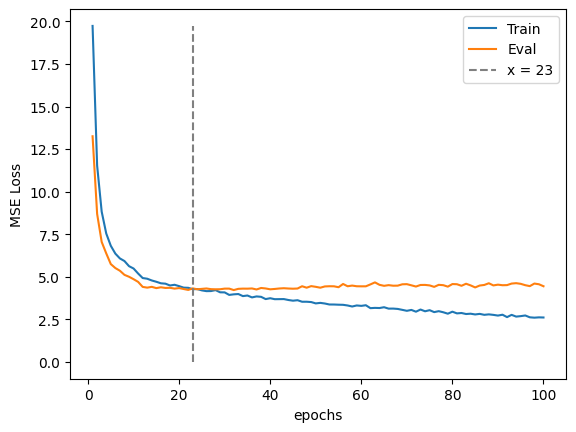

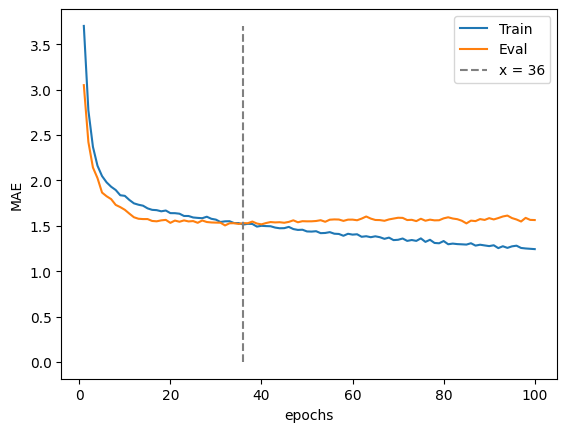

Epoch 001: | Train Loss: 19.86347 | Val Loss: 13.95312 | Train Acc: 3.707| Val Acc: 3.130
Epoch 002: | Train Loss: 11.71841 | Val Loss: 8.66777 | Train Acc: 2.799| Val Acc: 2.330
Epoch 003: | Train Loss: 8.76061 | Val Loss: 7.10113 | Train Acc: 2.376| Val Acc: 2.108
Epoch 004: | Train Loss: 7.56554 | Val Loss: 6.25739 | Train Acc: 2.179| Val Acc: 1.979
Epoch 005: | Train Loss: 6.91551 | Val Loss: 5.80127 | Train Acc: 2.070| Val Acc: 1.878
Epoch 006: | Train Loss: 6.41188 | Val Loss: 5.40245 | Train Acc: 1.992| Val Acc: 1.786
Epoch 007: | Train Loss: 6.09549 | Val Loss: 4.93858 | Train Acc: 1.925| Val Acc: 1.724
Epoch 008: | Train Loss: 5.75085 | Val Loss: 4.85069 | Train Acc: 1.882| Val Acc: 1.729
Epoch 009: | Train Loss: 5.63596 | Val Loss: 4.79247 | Train Acc: 1.849| Val Acc: 1.696
Epoch 010: | Train Loss: 5.53673 | Val Loss: 4.71308 | Train Acc: 1.839| Val Acc: 1.690
Epoch 011: | Train Loss: 5.24935 | Val Loss: 4.34415 | Train Acc: 1.806| Val Acc: 1.615
Epoch 012: | Train Loss: 5.00

Epoch 095: | Train Loss: 2.72803 | Val Loss: 4.11415 | Train Acc: 1.275| Val Acc: 1.469
Epoch 096: | Train Loss: 2.67215 | Val Loss: 4.09009 | Train Acc: 1.265| Val Acc: 1.472
Epoch 097: | Train Loss: 2.63829 | Val Loss: 4.04410 | Train Acc: 1.254| Val Acc: 1.473
Epoch 098: | Train Loss: 2.69226 | Val Loss: 4.09317 | Train Acc: 1.272| Val Acc: 1.524
Epoch 099: | Train Loss: 2.63273 | Val Loss: 4.07730 | Train Acc: 1.253| Val Acc: 1.496
Epoch 100: | Train Loss: 2.72021 | Val Loss: 4.11029 | Train Acc: 1.274| Val Acc: 1.504


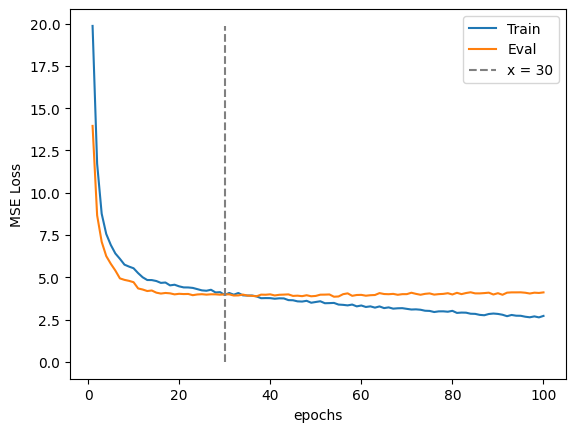

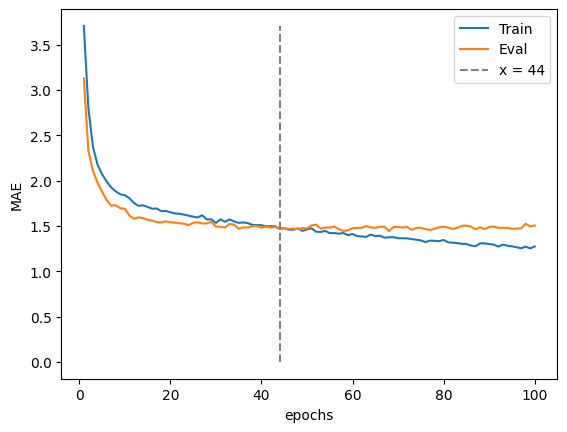

Epoch 001: | Train Loss: 19.31708 | Val Loss: 14.48843 | Train Acc: 3.652| Val Acc: 3.184
Epoch 002: | Train Loss: 11.52552 | Val Loss: 9.15841 | Train Acc: 2.764| Val Acc: 2.471
Epoch 003: | Train Loss: 8.78220 | Val Loss: 7.26546 | Train Acc: 2.371| Val Acc: 2.118
Epoch 004: | Train Loss: 7.52225 | Val Loss: 6.52990 | Train Acc: 2.160| Val Acc: 1.990
Epoch 005: | Train Loss: 6.83054 | Val Loss: 5.82594 | Train Acc: 2.059| Val Acc: 1.905
Epoch 006: | Train Loss: 6.38981 | Val Loss: 5.27410 | Train Acc: 1.981| Val Acc: 1.825
Epoch 007: | Train Loss: 5.78131 | Val Loss: 4.91459 | Train Acc: 1.878| Val Acc: 1.707
Epoch 008: | Train Loss: 5.50682 | Val Loss: 4.74550 | Train Acc: 1.849| Val Acc: 1.705
Epoch 009: | Train Loss: 5.26385 | Val Loss: 4.61100 | Train Acc: 1.804| Val Acc: 1.668
Epoch 010: | Train Loss: 5.23315 | Val Loss: 4.49285 | Train Acc: 1.793| Val Acc: 1.656
Epoch 011: | Train Loss: 5.07751 | Val Loss: 4.35014 | Train Acc: 1.766| Val Acc: 1.628
Epoch 012: | Train Loss: 4.91

Epoch 095: | Train Loss: 2.75078 | Val Loss: 4.17474 | Train Acc: 1.285| Val Acc: 1.496
Epoch 096: | Train Loss: 2.61005 | Val Loss: 4.14568 | Train Acc: 1.255| Val Acc: 1.516
Epoch 097: | Train Loss: 2.64292 | Val Loss: 4.13336 | Train Acc: 1.261| Val Acc: 1.489
Epoch 098: | Train Loss: 2.65286 | Val Loss: 4.00170 | Train Acc: 1.259| Val Acc: 1.472
Epoch 099: | Train Loss: 2.61580 | Val Loss: 4.06202 | Train Acc: 1.256| Val Acc: 1.449
Epoch 100: | Train Loss: 2.65761 | Val Loss: 4.06096 | Train Acc: 1.254| Val Acc: 1.513


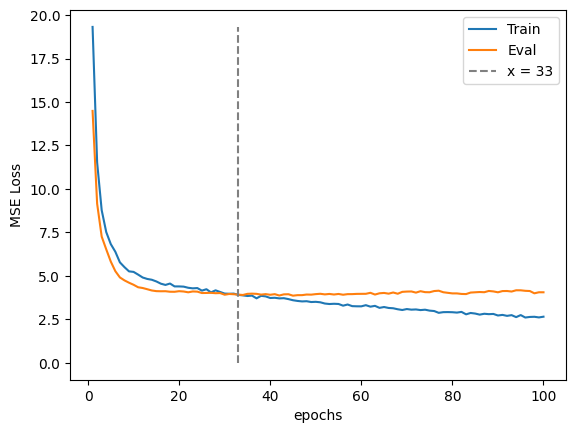

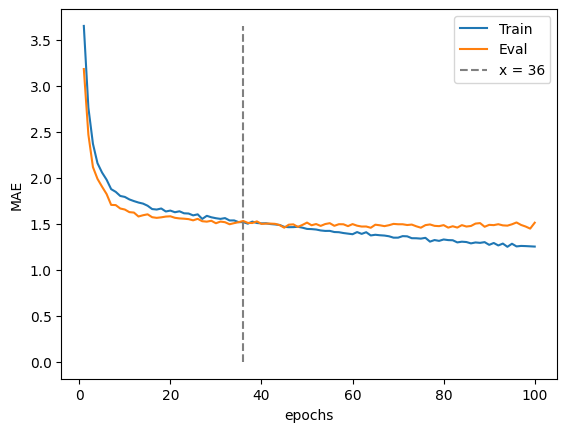

Epoch 001: | Train Loss: 19.82201 | Val Loss: 13.50233 | Train Acc: 3.717| Val Acc: 3.058
Epoch 002: | Train Loss: 11.80622 | Val Loss: 9.02832 | Train Acc: 2.798| Val Acc: 2.447
Epoch 003: | Train Loss: 8.86860 | Val Loss: 7.31403 | Train Acc: 2.378| Val Acc: 2.130
Epoch 004: | Train Loss: 7.52484 | Val Loss: 6.63447 | Train Acc: 2.160| Val Acc: 2.016
Epoch 005: | Train Loss: 6.87814 | Val Loss: 6.17729 | Train Acc: 2.062| Val Acc: 1.943
Epoch 006: | Train Loss: 6.40756 | Val Loss: 5.71192 | Train Acc: 1.975| Val Acc: 1.868
Epoch 007: | Train Loss: 6.01269 | Val Loss: 5.41128 | Train Acc: 1.924| Val Acc: 1.813
Epoch 008: | Train Loss: 5.66913 | Val Loss: 4.94814 | Train Acc: 1.865| Val Acc: 1.731
Epoch 009: | Train Loss: 5.35621 | Val Loss: 4.76535 | Train Acc: 1.823| Val Acc: 1.690
Epoch 010: | Train Loss: 5.21114 | Val Loss: 4.65533 | Train Acc: 1.803| Val Acc: 1.653
Epoch 011: | Train Loss: 5.03816 | Val Loss: 4.57828 | Train Acc: 1.761| Val Acc: 1.652
Epoch 012: | Train Loss: 4.87

Epoch 095: | Train Loss: 2.67534 | Val Loss: 4.47435 | Train Acc: 1.262| Val Acc: 1.529
Epoch 096: | Train Loss: 2.66046 | Val Loss: 4.57465 | Train Acc: 1.258| Val Acc: 1.550
Epoch 097: | Train Loss: 2.66808 | Val Loss: 4.48511 | Train Acc: 1.266| Val Acc: 1.529
Epoch 098: | Train Loss: 2.60963 | Val Loss: 4.60061 | Train Acc: 1.249| Val Acc: 1.522
Epoch 099: | Train Loss: 2.61323 | Val Loss: 4.56495 | Train Acc: 1.250| Val Acc: 1.535
Epoch 100: | Train Loss: 2.66145 | Val Loss: 4.63218 | Train Acc: 1.262| Val Acc: 1.558


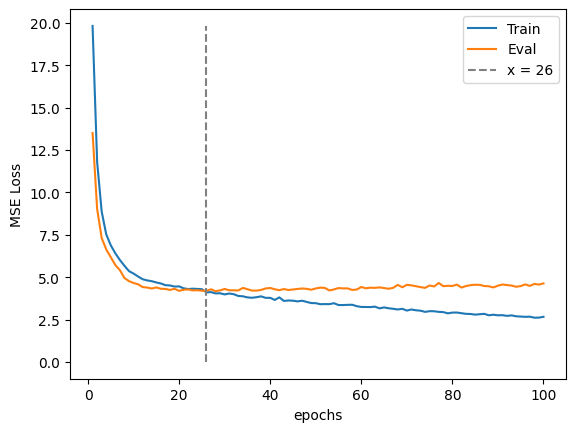

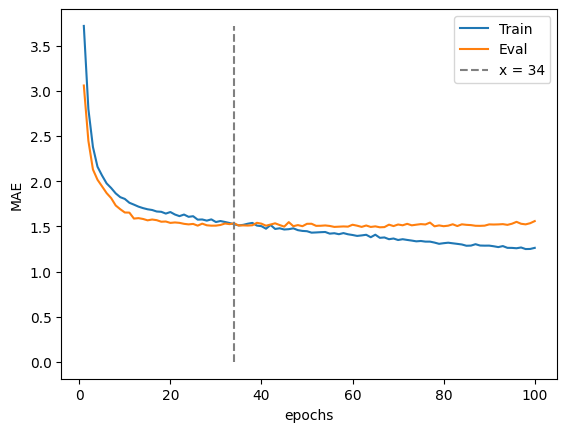

Epoch 001: | Train Loss: 19.67034 | Val Loss: 13.34570 | Train Acc: 3.696| Val Acc: 3.015
Epoch 002: | Train Loss: 11.62835 | Val Loss: 9.01108 | Train Acc: 2.790| Val Acc: 2.433
Epoch 003: | Train Loss: 8.76042 | Val Loss: 7.36144 | Train Acc: 2.355| Val Acc: 2.140
Epoch 004: | Train Loss: 7.66177 | Val Loss: 6.56386 | Train Acc: 2.178| Val Acc: 2.026
Epoch 005: | Train Loss: 7.02612 | Val Loss: 6.02842 | Train Acc: 2.094| Val Acc: 1.920
Epoch 006: | Train Loss: 6.47332 | Val Loss: 5.68690 | Train Acc: 1.994| Val Acc: 1.886
Epoch 007: | Train Loss: 6.19707 | Val Loss: 5.45600 | Train Acc: 1.956| Val Acc: 1.839
Epoch 008: | Train Loss: 5.92426 | Val Loss: 5.26806 | Train Acc: 1.899| Val Acc: 1.797
Epoch 009: | Train Loss: 5.76341 | Val Loss: 4.98255 | Train Acc: 1.884| Val Acc: 1.734
Epoch 010: | Train Loss: 5.60470 | Val Loss: 4.86498 | Train Acc: 1.850| Val Acc: 1.715
Epoch 011: | Train Loss: 5.31276 | Val Loss: 4.77480 | Train Acc: 1.802| Val Acc: 1.714
Epoch 012: | Train Loss: 5.26

Epoch 095: | Train Loss: 2.73400 | Val Loss: 4.04239 | Train Acc: 1.271| Val Acc: 1.527
Epoch 096: | Train Loss: 2.69953 | Val Loss: 4.25556 | Train Acc: 1.275| Val Acc: 1.535
Epoch 097: | Train Loss: 2.65773 | Val Loss: 4.08277 | Train Acc: 1.262| Val Acc: 1.518
Epoch 098: | Train Loss: 2.69038 | Val Loss: 4.10379 | Train Acc: 1.266| Val Acc: 1.522
Epoch 099: | Train Loss: 2.62895 | Val Loss: 4.06006 | Train Acc: 1.249| Val Acc: 1.510
Epoch 100: | Train Loss: 2.60819 | Val Loss: 4.03216 | Train Acc: 1.253| Val Acc: 1.494


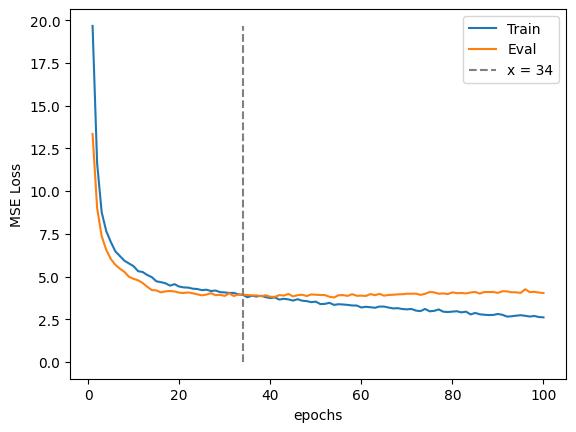

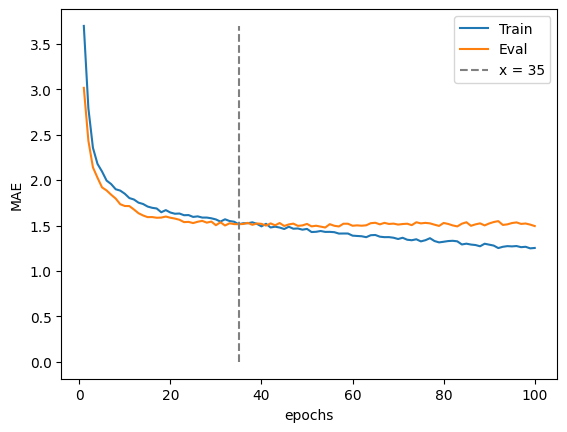

Epoch 001: | Train Loss: 20.07096 | Val Loss: 12.25489 | Train Acc: 3.738| Val Acc: 2.908
Epoch 002: | Train Loss: 11.56478 | Val Loss: 8.33835 | Train Acc: 2.773| Val Acc: 2.321
Epoch 003: | Train Loss: 8.82241 | Val Loss: 6.97291 | Train Acc: 2.369| Val Acc: 2.081
Epoch 004: | Train Loss: 7.61727 | Val Loss: 6.39112 | Train Acc: 2.173| Val Acc: 1.972
Epoch 005: | Train Loss: 6.98459 | Val Loss: 5.66162 | Train Acc: 2.070| Val Acc: 1.862
Epoch 006: | Train Loss: 6.52719 | Val Loss: 5.24676 | Train Acc: 2.005| Val Acc: 1.764
Epoch 007: | Train Loss: 6.22205 | Val Loss: 4.91289 | Train Acc: 1.944| Val Acc: 1.700
Epoch 008: | Train Loss: 5.79009 | Val Loss: 4.52620 | Train Acc: 1.880| Val Acc: 1.654
Epoch 009: | Train Loss: 5.60224 | Val Loss: 4.18139 | Train Acc: 1.843| Val Acc: 1.559
Epoch 010: | Train Loss: 5.37595 | Val Loss: 4.13547 | Train Acc: 1.812| Val Acc: 1.570
Epoch 011: | Train Loss: 5.12938 | Val Loss: 4.03335 | Train Acc: 1.771| Val Acc: 1.537
Epoch 012: | Train Loss: 5.04

Epoch 095: | Train Loss: 2.70381 | Val Loss: 3.94981 | Train Acc: 1.270| Val Acc: 1.442
Epoch 096: | Train Loss: 2.58952 | Val Loss: 3.89434 | Train Acc: 1.242| Val Acc: 1.432
Epoch 097: | Train Loss: 2.57828 | Val Loss: 3.81119 | Train Acc: 1.246| Val Acc: 1.425
Epoch 098: | Train Loss: 2.60730 | Val Loss: 3.91503 | Train Acc: 1.254| Val Acc: 1.425
Epoch 099: | Train Loss: 2.60884 | Val Loss: 3.89046 | Train Acc: 1.250| Val Acc: 1.440
Epoch 100: | Train Loss: 2.56614 | Val Loss: 3.91746 | Train Acc: 1.231| Val Acc: 1.433


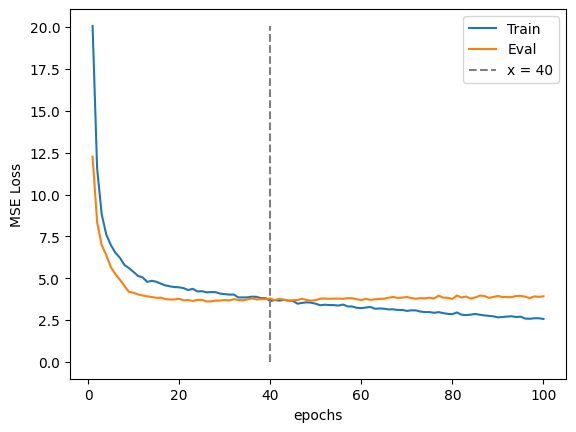

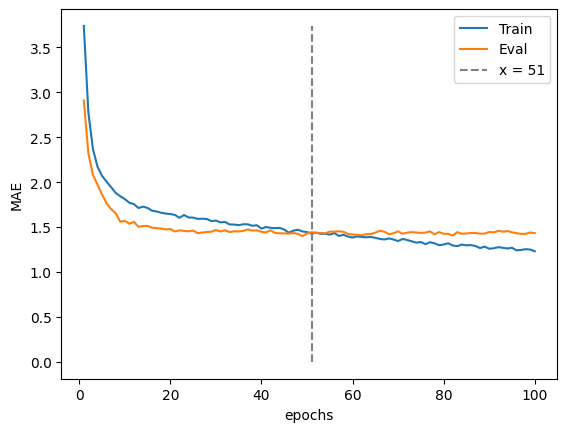

MAE on train set:  1.059078812072824
min prediction: 0
max prediction: 9

MAE on test set:  1.5336145890038106
Error <= 3: 91.02 %
min prediction: 0
max prediction: 9


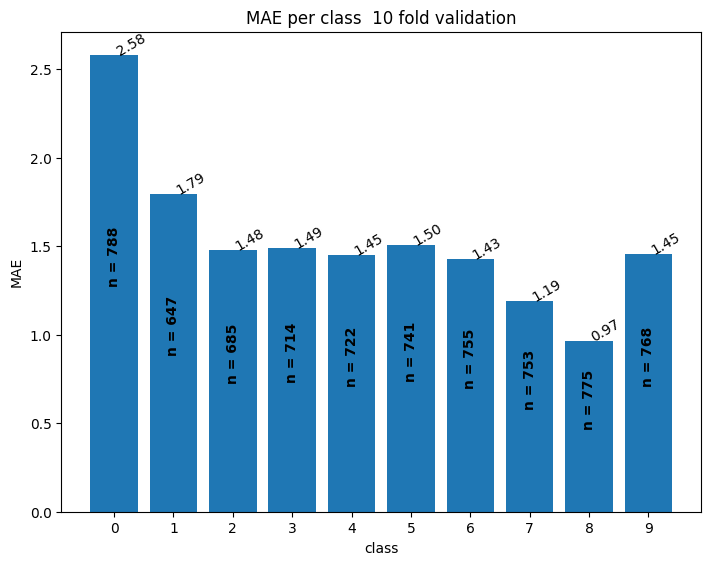

-----------|class error-MAE| difference-----------
mean: 0.2364588206247776
std: 0.3379305212789425
coefficient of variation (std/mean): 1.429130536919933

----------normalized difference-------------
mean: 0.2098514991596992
std: 0.2999051856675537


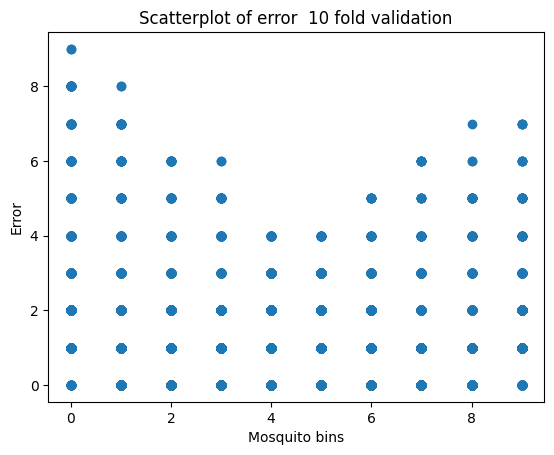

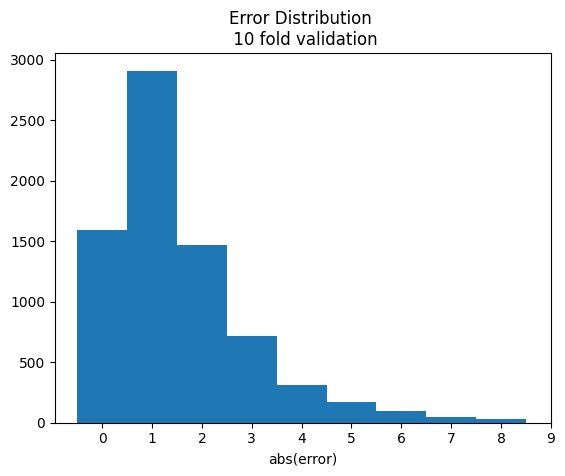

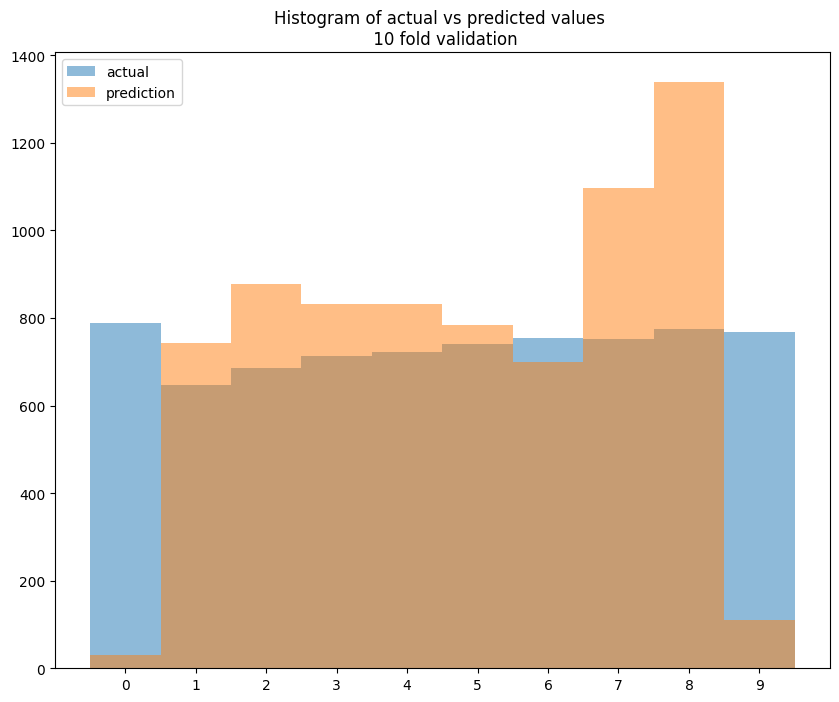

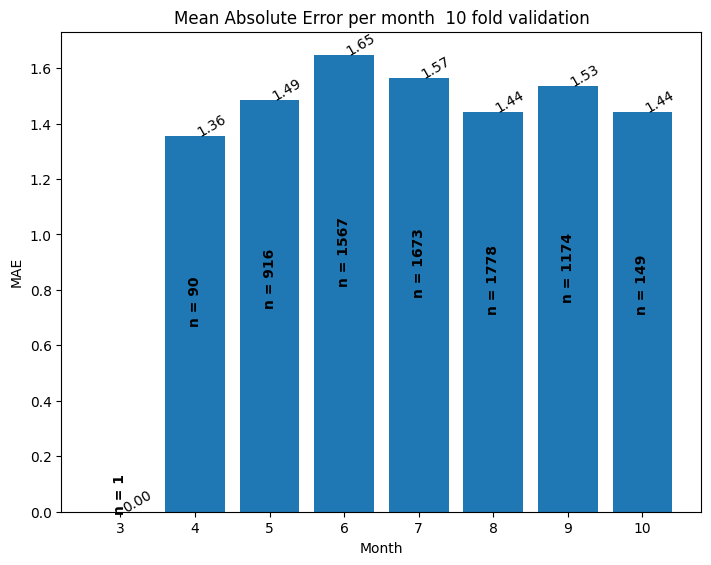

In [9]:
train_model_KFold(data, model, date_col='dt_placement', case='')

Epoch 001: | Train Loss: 20.12862 | Val Loss: 4.90001 | Train Acc: 3.772| Val Acc: 1.308
Epoch 002: | Train Loss: 11.76463 | Val Loss: 4.74729 | Train Acc: 2.830| Val Acc: 1.308
Epoch 003: | Train Loss: 8.85552 | Val Loss: 4.41419 | Train Acc: 2.391| Val Acc: 1.286
Epoch 004: | Train Loss: 7.53503 | Val Loss: 4.19034 | Train Acc: 2.157| Val Acc: 1.253
Epoch 005: | Train Loss: 6.95778 | Val Loss: 4.14928 | Train Acc: 2.064| Val Acc: 1.275
Epoch 006: | Train Loss: 6.60769 | Val Loss: 4.36317 | Train Acc: 2.004| Val Acc: 1.297
Epoch 007: | Train Loss: 6.03018 | Val Loss: 5.08065 | Train Acc: 1.924| Val Acc: 1.407
Epoch 008: | Train Loss: 5.78510 | Val Loss: 5.04483 | Train Acc: 1.877| Val Acc: 1.418
Epoch 009: | Train Loss: 5.56625 | Val Loss: 4.90198 | Train Acc: 1.844| Val Acc: 1.418
Epoch 010: | Train Loss: 5.30599 | Val Loss: 4.37056 | Train Acc: 1.793| Val Acc: 1.308
Epoch 011: | Train Loss: 5.11181 | Val Loss: 3.69054 | Train Acc: 1.757| Val Acc: 1.418
Epoch 012: | Train Loss: 4.927

Epoch 095: | Train Loss: 2.59607 | Val Loss: 4.09462 | Train Acc: 1.247| Val Acc: 1.604
Epoch 096: | Train Loss: 2.55805 | Val Loss: 4.70328 | Train Acc: 1.250| Val Acc: 1.802
Epoch 097: | Train Loss: 2.59210 | Val Loss: 4.42535 | Train Acc: 1.243| Val Acc: 1.703
Epoch 098: | Train Loss: 2.52713 | Val Loss: 4.47393 | Train Acc: 1.237| Val Acc: 1.703
Epoch 099: | Train Loss: 2.53306 | Val Loss: 5.00996 | Train Acc: 1.239| Val Acc: 1.857
Epoch 100: | Train Loss: 2.54698 | Val Loss: 4.25357 | Train Acc: 1.233| Val Acc: 1.670


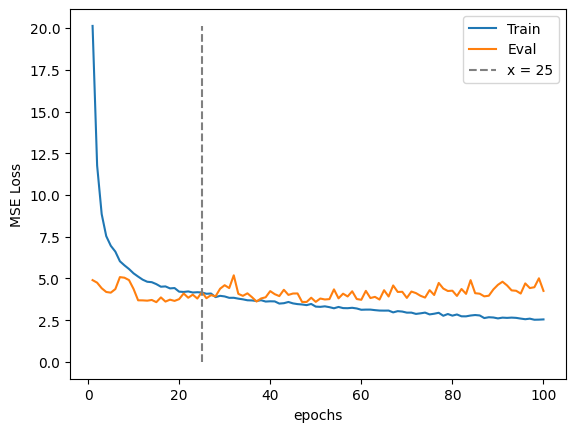

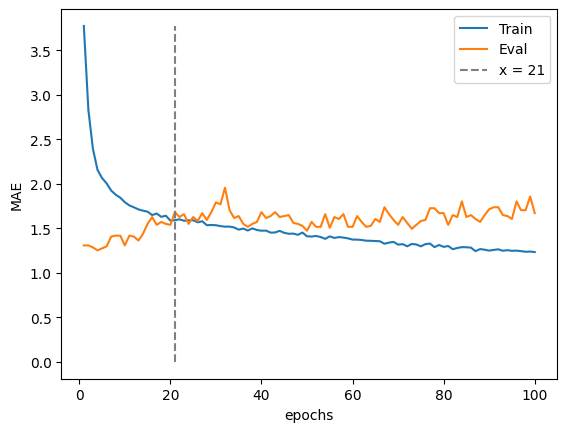

Epoch 001: | Train Loss: 3.07122 | Val Loss: 10.28182 | Train Acc: 1.357| Val Acc: 2.489
Epoch 002: | Train Loss: 2.92981 | Val Loss: 10.01053 | Train Acc: 1.319| Val Acc: 2.480
Epoch 003: | Train Loss: 2.87763 | Val Loss: 9.14587 | Train Acc: 1.311| Val Acc: 2.346
Epoch 004: | Train Loss: 2.87039 | Val Loss: 9.59948 | Train Acc: 1.303| Val Acc: 2.450
Epoch 005: | Train Loss: 2.84437 | Val Loss: 9.89137 | Train Acc: 1.303| Val Acc: 2.432
Epoch 006: | Train Loss: 2.79618 | Val Loss: 9.25120 | Train Acc: 1.295| Val Acc: 2.363
Epoch 007: | Train Loss: 2.78009 | Val Loss: 9.47139 | Train Acc: 1.289| Val Acc: 2.381
Epoch 008: | Train Loss: 2.78736 | Val Loss: 8.90426 | Train Acc: 1.295| Val Acc: 2.327
Epoch 009: | Train Loss: 2.75929 | Val Loss: 9.73986 | Train Acc: 1.284| Val Acc: 2.446
Epoch 010: | Train Loss: 2.68822 | Val Loss: 10.27468 | Train Acc: 1.271| Val Acc: 2.506
Epoch 011: | Train Loss: 2.62938 | Val Loss: 10.11757 | Train Acc: 1.248| Val Acc: 2.478
Epoch 012: | Train Loss: 2.6

Epoch 095: | Train Loss: 1.80432 | Val Loss: 7.09271 | Train Acc: 1.026| Val Acc: 2.069
Epoch 096: | Train Loss: 1.79987 | Val Loss: 7.19181 | Train Acc: 1.025| Val Acc: 2.111
Epoch 097: | Train Loss: 1.82036 | Val Loss: 7.16818 | Train Acc: 1.036| Val Acc: 2.091
Epoch 098: | Train Loss: 1.79637 | Val Loss: 7.03787 | Train Acc: 1.030| Val Acc: 2.061
Epoch 099: | Train Loss: 1.81446 | Val Loss: 7.04019 | Train Acc: 1.022| Val Acc: 2.064
Epoch 100: | Train Loss: 1.77001 | Val Loss: 7.27352 | Train Acc: 1.022| Val Acc: 2.057


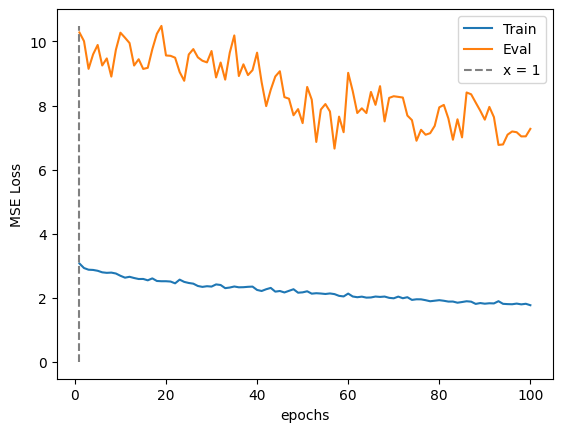

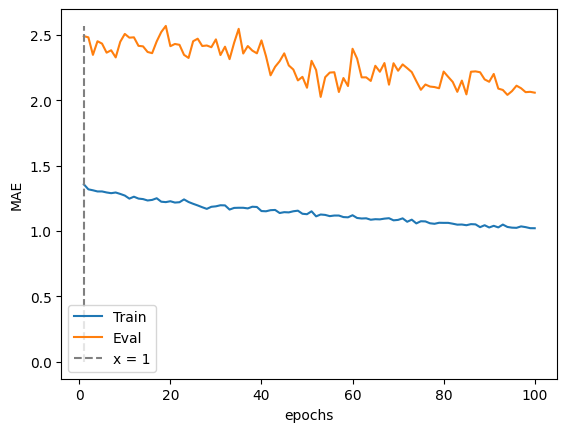

Epoch 001: | Train Loss: 2.66161 | Val Loss: 6.15488 | Train Acc: 1.240| Val Acc: 1.927
Epoch 002: | Train Loss: 2.49025 | Val Loss: 5.80051 | Train Acc: 1.203| Val Acc: 1.874
Epoch 003: | Train Loss: 2.36738 | Val Loss: 5.73982 | Train Acc: 1.178| Val Acc: 1.900
Epoch 004: | Train Loss: 2.37202 | Val Loss: 5.53432 | Train Acc: 1.180| Val Acc: 1.863
Epoch 005: | Train Loss: 2.32547 | Val Loss: 5.70031 | Train Acc: 1.159| Val Acc: 1.883
Epoch 006: | Train Loss: 2.23759 | Val Loss: 5.41325 | Train Acc: 1.139| Val Acc: 1.806
Epoch 007: | Train Loss: 2.25171 | Val Loss: 6.00511 | Train Acc: 1.146| Val Acc: 1.979
Epoch 008: | Train Loss: 2.22318 | Val Loss: 6.49913 | Train Acc: 1.135| Val Acc: 2.078
Epoch 009: | Train Loss: 2.20703 | Val Loss: 6.46983 | Train Acc: 1.141| Val Acc: 2.090
Epoch 010: | Train Loss: 2.16592 | Val Loss: 6.50404 | Train Acc: 1.133| Val Acc: 2.065
Epoch 011: | Train Loss: 2.22986 | Val Loss: 6.30261 | Train Acc: 1.149| Val Acc: 2.103
Epoch 012: | Train Loss: 2.15000

Epoch 095: | Train Loss: 1.58433 | Val Loss: 7.58220 | Train Acc: 0.956| Val Acc: 2.076
Epoch 096: | Train Loss: 1.51779 | Val Loss: 7.13621 | Train Acc: 0.932| Val Acc: 2.029
Epoch 097: | Train Loss: 1.56316 | Val Loss: 6.71556 | Train Acc: 0.945| Val Acc: 2.004
Epoch 098: | Train Loss: 1.48582 | Val Loss: 6.66596 | Train Acc: 0.921| Val Acc: 2.023
Epoch 099: | Train Loss: 1.54092 | Val Loss: 6.91843 | Train Acc: 0.940| Val Acc: 2.033
Epoch 100: | Train Loss: 1.53633 | Val Loss: 7.19538 | Train Acc: 0.932| Val Acc: 2.073


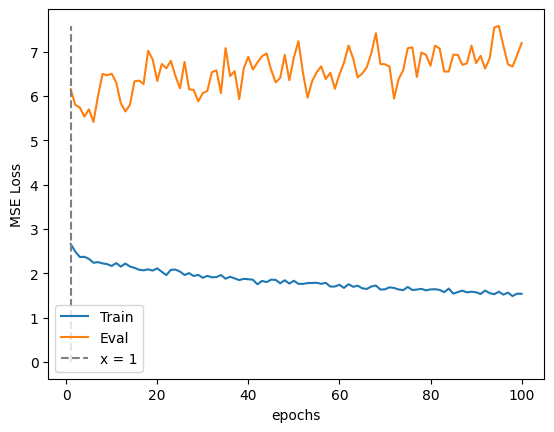

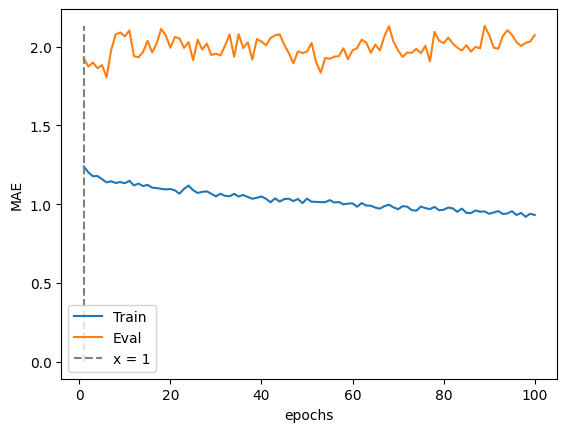

Epoch 001: | Train Loss: 2.25256 | Val Loss: 5.57005 | Train Acc: 1.129| Val Acc: 1.762
Epoch 002: | Train Loss: 2.05706 | Val Loss: 5.61992 | Train Acc: 1.080| Val Acc: 1.771
Epoch 003: | Train Loss: 2.07446 | Val Loss: 5.89065 | Train Acc: 1.082| Val Acc: 1.855
Epoch 004: | Train Loss: 2.07130 | Val Loss: 5.58099 | Train Acc: 1.080| Val Acc: 1.823
Epoch 005: | Train Loss: 1.98692 | Val Loss: 5.61819 | Train Acc: 1.073| Val Acc: 1.824
Epoch 006: | Train Loss: 1.94713 | Val Loss: 5.51899 | Train Acc: 1.066| Val Acc: 1.807
Epoch 007: | Train Loss: 1.96168 | Val Loss: 5.60851 | Train Acc: 1.057| Val Acc: 1.843
Epoch 008: | Train Loss: 1.97216 | Val Loss: 5.48022 | Train Acc: 1.060| Val Acc: 1.847
Epoch 009: | Train Loss: 1.97163 | Val Loss: 5.51489 | Train Acc: 1.061| Val Acc: 1.760
Epoch 010: | Train Loss: 1.92471 | Val Loss: 5.53162 | Train Acc: 1.042| Val Acc: 1.809
Epoch 011: | Train Loss: 1.87426 | Val Loss: 5.70830 | Train Acc: 1.044| Val Acc: 1.830
Epoch 012: | Train Loss: 1.81717

Epoch 095: | Train Loss: 1.39383 | Val Loss: 5.32693 | Train Acc: 0.882| Val Acc: 1.715
Epoch 096: | Train Loss: 1.38416 | Val Loss: 5.52904 | Train Acc: 0.882| Val Acc: 1.773
Epoch 097: | Train Loss: 1.41805 | Val Loss: 5.41135 | Train Acc: 0.884| Val Acc: 1.744
Epoch 098: | Train Loss: 1.38404 | Val Loss: 5.53387 | Train Acc: 0.885| Val Acc: 1.719
Epoch 099: | Train Loss: 1.39549 | Val Loss: 5.39132 | Train Acc: 0.876| Val Acc: 1.693
Epoch 100: | Train Loss: 1.40720 | Val Loss: 5.23248 | Train Acc: 0.883| Val Acc: 1.687


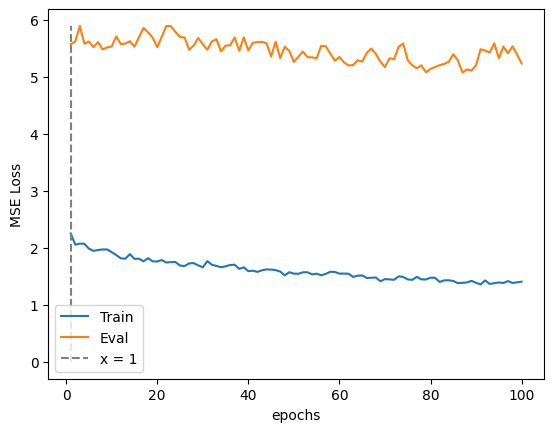

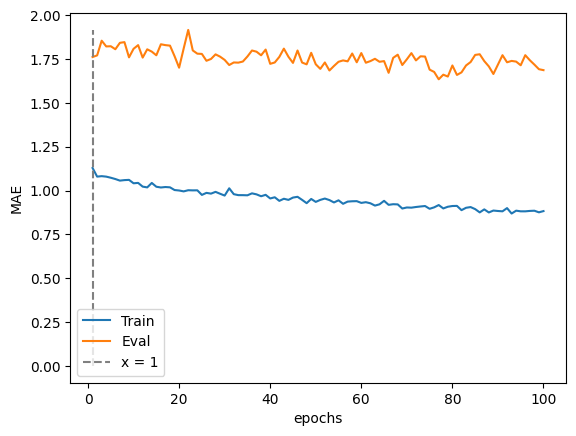

Epoch 001: | Train Loss: 2.07722 | Val Loss: 4.61983 | Train Acc: 1.066| Val Acc: 1.678
Epoch 002: | Train Loss: 1.98150 | Val Loss: 4.68752 | Train Acc: 1.053| Val Acc: 1.632
Epoch 003: | Train Loss: 1.84079 | Val Loss: 4.70917 | Train Acc: 1.028| Val Acc: 1.667
Epoch 004: | Train Loss: 1.85229 | Val Loss: 4.51930 | Train Acc: 1.013| Val Acc: 1.632
Epoch 005: | Train Loss: 1.82722 | Val Loss: 4.60852 | Train Acc: 1.008| Val Acc: 1.667
Epoch 006: | Train Loss: 1.78069 | Val Loss: 4.43311 | Train Acc: 1.001| Val Acc: 1.586
Epoch 007: | Train Loss: 1.78807 | Val Loss: 4.23172 | Train Acc: 0.997| Val Acc: 1.563
Epoch 008: | Train Loss: 1.76139 | Val Loss: 4.34480 | Train Acc: 0.996| Val Acc: 1.586
Epoch 009: | Train Loss: 1.74054 | Val Loss: 4.51380 | Train Acc: 0.998| Val Acc: 1.655
Epoch 010: | Train Loss: 1.73676 | Val Loss: 4.37380 | Train Acc: 0.992| Val Acc: 1.598
Epoch 011: | Train Loss: 1.72152 | Val Loss: 4.50000 | Train Acc: 0.986| Val Acc: 1.586
Epoch 012: | Train Loss: 1.63388

Epoch 095: | Train Loss: 1.30005 | Val Loss: 5.11841 | Train Acc: 0.829| Val Acc: 1.632
Epoch 096: | Train Loss: 1.27054 | Val Loss: 5.39320 | Train Acc: 0.842| Val Acc: 1.724
Epoch 097: | Train Loss: 1.33878 | Val Loss: 5.30307 | Train Acc: 0.857| Val Acc: 1.759
Epoch 098: | Train Loss: 1.32293 | Val Loss: 5.14613 | Train Acc: 0.856| Val Acc: 1.736
Epoch 099: | Train Loss: 1.29113 | Val Loss: 4.94478 | Train Acc: 0.842| Val Acc: 1.701
Epoch 100: | Train Loss: 1.30362 | Val Loss: 5.39166 | Train Acc: 0.835| Val Acc: 1.747


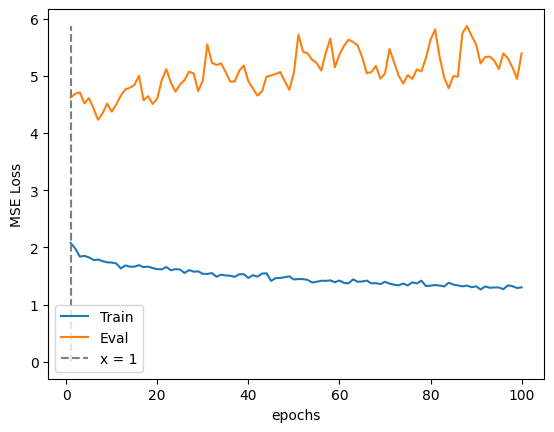

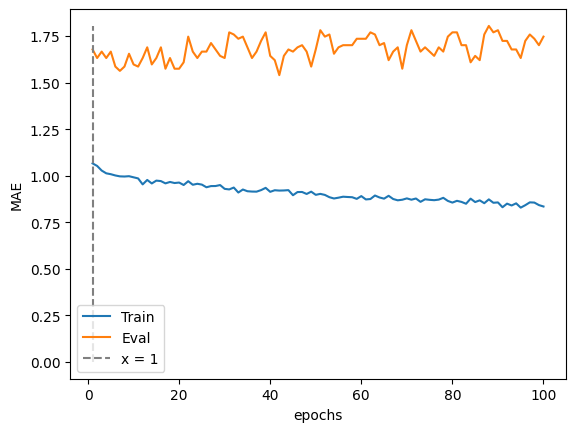

MAE on train set:  0.8029639026640526
min prediction: 0
max prediction: 9

MAE on test set:  1.9686162624821684
Error <= 3: 83.02 %
min prediction: 0
max prediction: 8


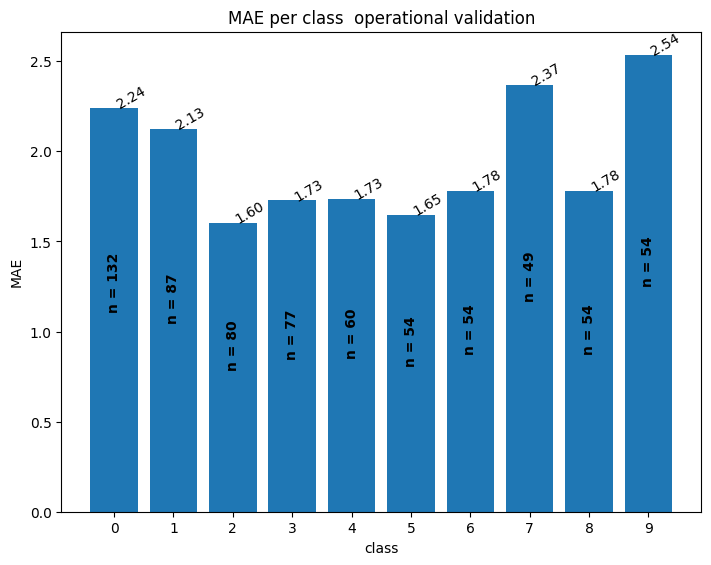

-----------|class error-MAE| difference-----------
mean: 0.5832815606214623
std: 0.3169825232045331
coefficient of variation (std/mean): 0.5434468438652532

----------normalized difference-------------
mean: 0.6224743927580823
std: 0.33828174413131984


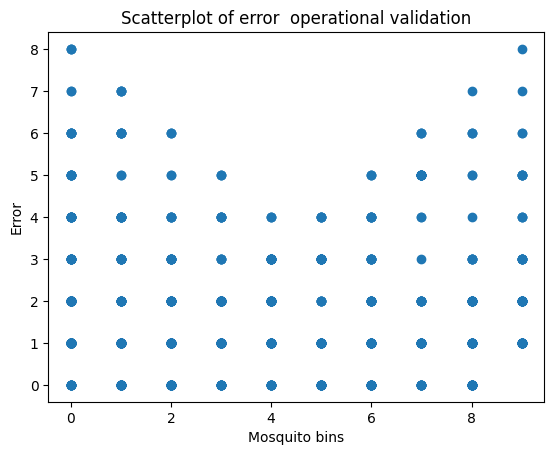

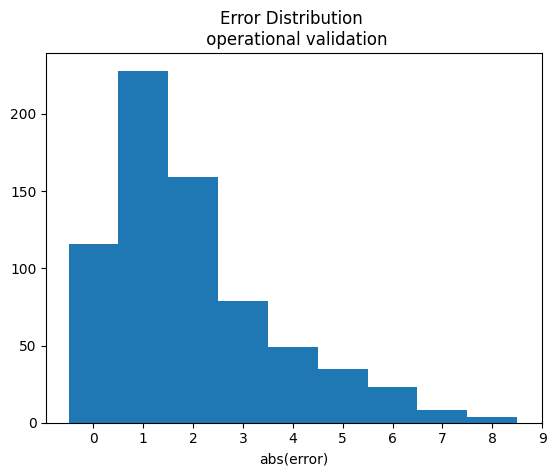

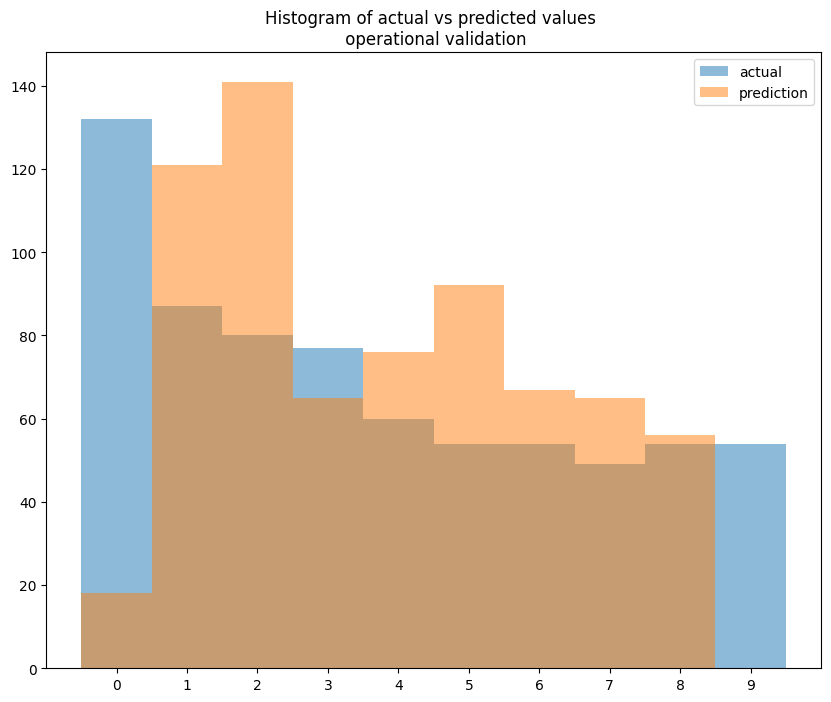

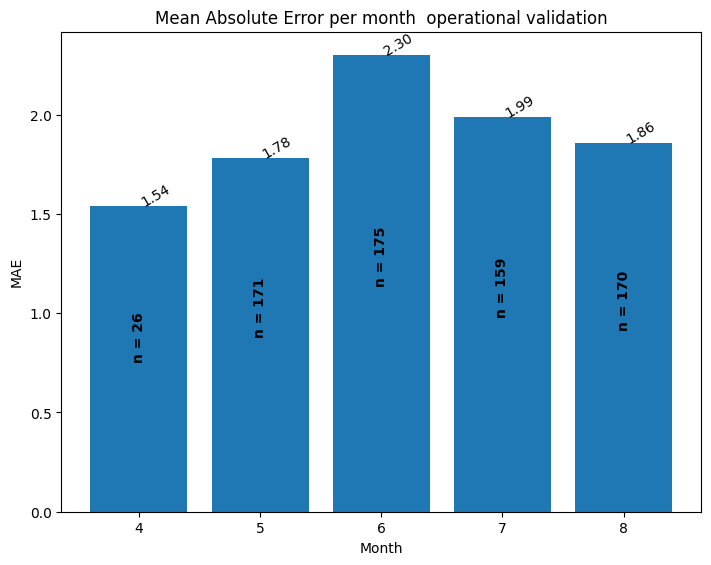

In [10]:
operational_validation(data, model, date='2022-01-01', filepath ='', date_col='dt_placement', case='', fi=False, export=False)